在这个教程中，你将会学到如何使用python的matplotlib包和seaborn包对出租车GPS数据绘制数据统计图表

<div class="alert alert-info"><h2>提供的基础数据是：</h2><p>    数据：<br>  
    1.出租车GPS数据(抽样)<br> 
    2.出租车OD数据<br></p></div>

# 读取数据

In [7]:
#读取GPS数据
import pandas as pd
data = pd.read_csv(r'data-sample/TaxiData-Sample',header = None)
data.columns = ['VehicleNum', 'Stime', 'Lng', 'Lat', 'OpenStatus', 'Speed']
data.head(5)

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed
0,22271,22:54:04,114.167000,22.718399,0,0
1,22271,18:26:26,114.190598,22.647800,0,4
2,22271,18:35:18,114.201401,22.649700,0,0
3,22271,16:02:46,114.233498,22.725901,0,24
4,22271,21:41:17,114.233597,22.720900,0,19


In [8]:
#读取OD数据
TaxiOD = pd.read_csv(r'data-sample/TaxiOD-All.csv')
TaxiOD.columns = ['VehicleNum', 'Stime', 'SLng', 'SLat', 
       'ELng', 'ELat','Etime']
TaxiOD.head(5)

,VehicleNum,Stime,SLng,SLat,ELng,ELat,Etime
0,22223,2013-10-22 00:03:23,114.167465,22.562468,114.225235,22.552750,2013-10-22 00:10:48
1,22223,2013-10-22 00:11:33,114.227150,22.554167,114.229218,22.560217,2013-10-22 00:15:19
2,22223,2013-10-22 00:17:13,114.231354,22.562166,114.255798,22.590967,2013-10-22 00:29:06
3,22223,2013-10-22 00:36:45,114.240196,22.563650,114.119965,22.566668,2013-10-22 00:54:42
4,22223,2013-10-22 01:01:14,114.135414,22.575933,114.166748,22.608267,2013-10-22 01:08:17


# 每小时GPS数据量绘图

## 将需要绘制的数据算出来

首先将需要绘制的数据算出来，主要用到df.groupby功能

我们要集计每小时的数据，那就需要有一列的内容表示数据哪个每小时，然后以那列数据为集计。因此这里我们对data的Stime列处理，得到该时间所属的小时，例如：

|Stime | |Hour |
| ----------- |---|-----------|
|22:54:04|→|22|

In [11]:
#计时
import time

timeflag = time.time()
# #方法1：把时间当成字符串，用列自带的str方法，取前两位
# data['Hour'] = data['Stime'].str.slice(0,2)
# #计算耗时
# print('方法1',time.time()-timeflag,'s')
# timeflag = time.time()

# #方法2：把时间当成字符串，遍历取字符串前两位
# data['Hour'] = data['Stime'].apply(lambda r:r[:2])
# #计算耗时
# print('方法2',time.time()-timeflag,'s')
# timeflag = time.time()

#方法3：转换为时间格式，后提取小时（非常慢）修改后
data['Hour'] = pd.to_datetime(data['Stime'], format='%Y-%m-%d %H:%M:%S').dt.hour
#计算耗时
print('方法3',time.time()-timeflag,'s')
timeflag = time.time()

###################################################################################

data['Hour']

C:\Users\hncdj\AppData\Local\Temp\ipykernel_25892\1856092905.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Stime']).dt.hour


方法3 38.38832235336304 s


0          22
1          18
2          18
3          16
4          21
           ..
1601302    20
1601303    20
1601304    20
1601305    20
1601306    20
Name: Hour, Length: 1601307, dtype: int32

可以看出来，一个好方法能够大大提高你的程序运行效率

集计每小时的数据量：

提示：需要用到pandasdataframe的方法df.groupby，百度一下，或者<a href="http://pandas.pydata.org/pandas-docs/stable/">戳这里是pandas的document</a>

In [12]:
hour_count = data.groupby('Hour')['VehicleNum'].count().reset_index()
hour_count

,Hour,VehicleNum
0,0,68745
1,1,63142
2,2,60680
3,3,57494
4,4,57060
5,5,59636
6,6,59742
7,7,63780
8,8,68224
9,9,64026


## 开始绘图
matplotlib是python最基础的绘图包，这里我们用matplotlib包来绘制每小时GPS数据量的图表

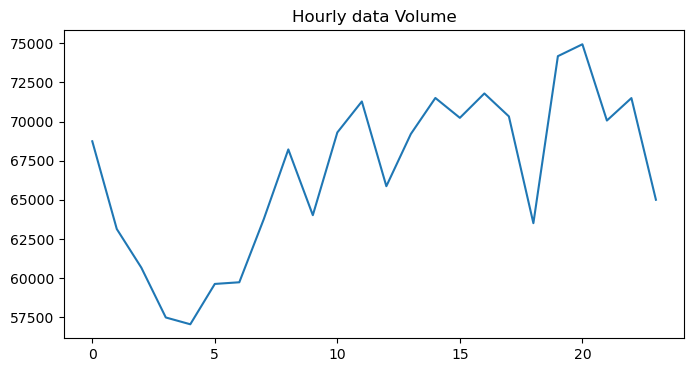

In [13]:
#一般，用matplotlib绘图的代码由3部分组成
#第一部分：创建图
import matplotlib.pyplot as plt
#创建一个图用plt.figure
#其中fig你可以想象是整张图,ax是图上的其中一个小画板（一个大图可以有多个小画板）
#而plt则是我们的画笔
fig     = plt.figure(1,(8,4))    
ax      = plt.subplot(111)
#告诉画笔，我们要在ax上画图
plt.sca(ax)

#第二部分：绘制
#用plt.plot画折线
plt.plot(hour_count['Hour'],hour_count['VehicleNum'])


#第三部分：调整
plt.title('Hourly data Volume')
plt.show()

ok，我们继续往代码加东西，调整一下出图效果

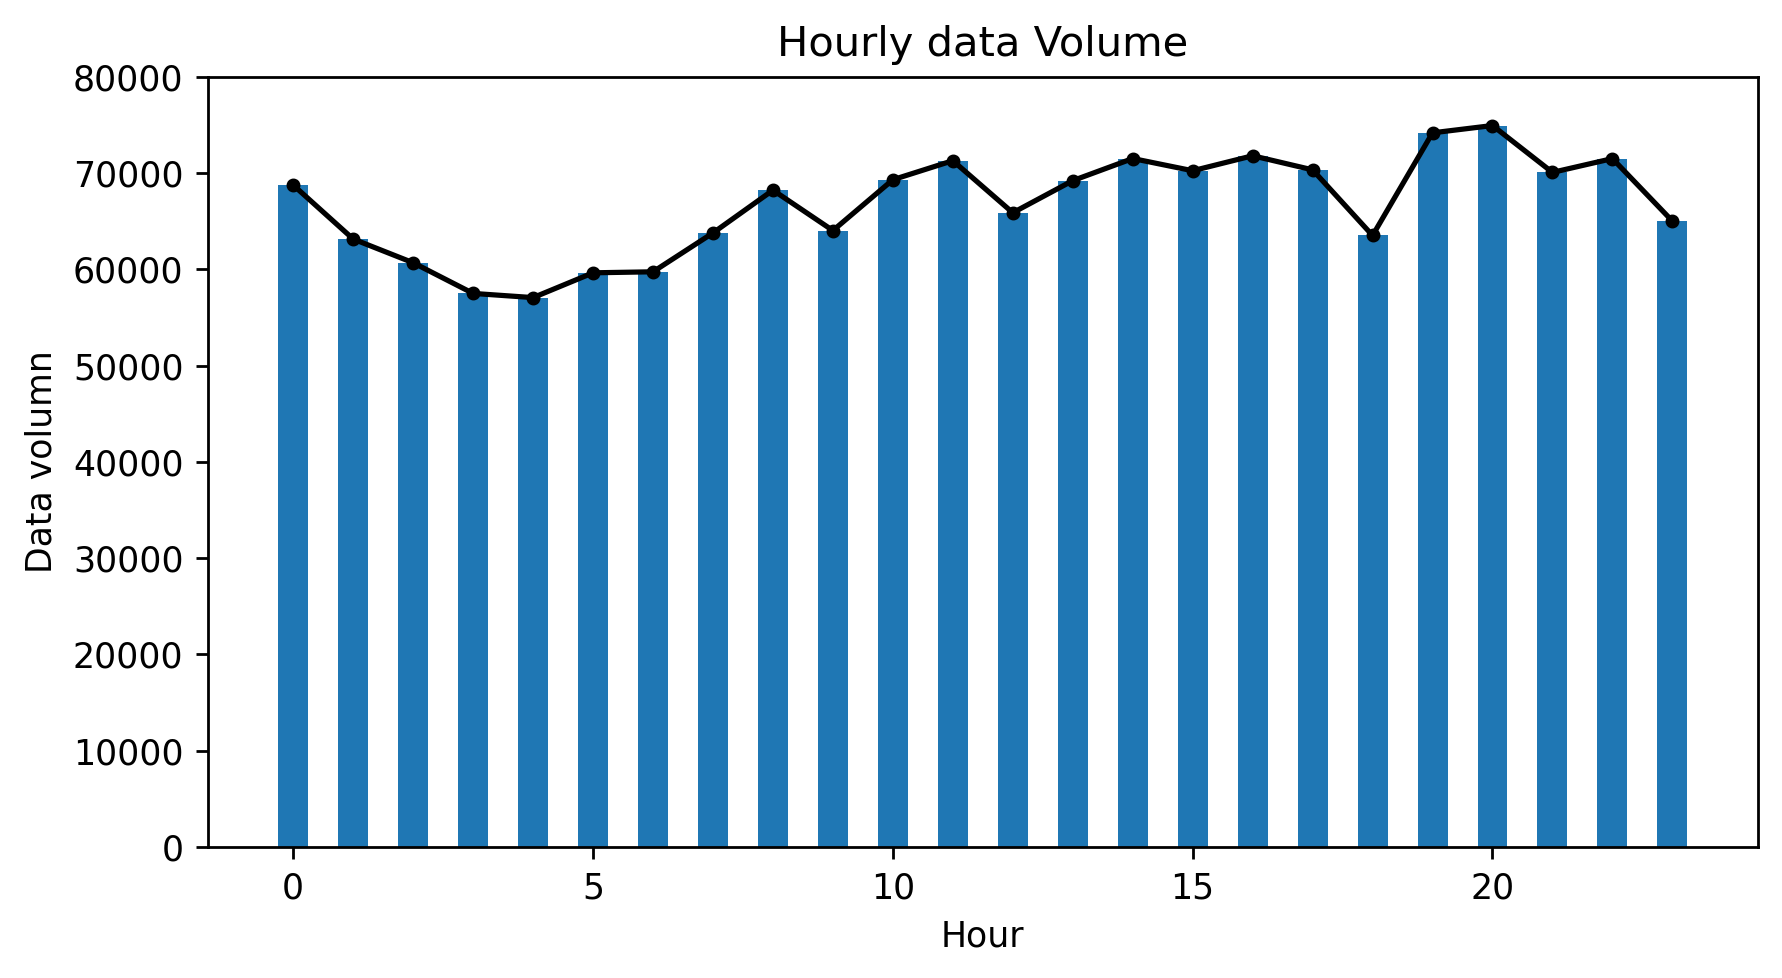

In [15]:
import matplotlib.pyplot as plt
fig     = plt.figure(1,(8,4),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

#折线图调整颜色加上数据点
plt.plot(hour_count['Hour'],hour_count['VehicleNum'],'k-',hour_count['Hour'],hour_count['VehicleNum'],'k.')
#加上条形图
plt.bar(hour_count['Hour'],hour_count['VehicleNum'],width =0.5)

plt.title('Hourly data Volume')

#把y轴起点固定在0
plt.ylim(0,80000)
plt.ylabel('Data volumn')
plt.xlabel('Hour')
plt.show()

[seaborn](http://seaborn.pydata.org/)是基于matplotlib的另一个绘图包，它提供了一些绘图的主题画出来的图更好看一点，也对一些功能进行集合，很多用plt多行代码才能画出来的图它只需要一行。另外，我们可以用seaborn的主题来画matplotlib

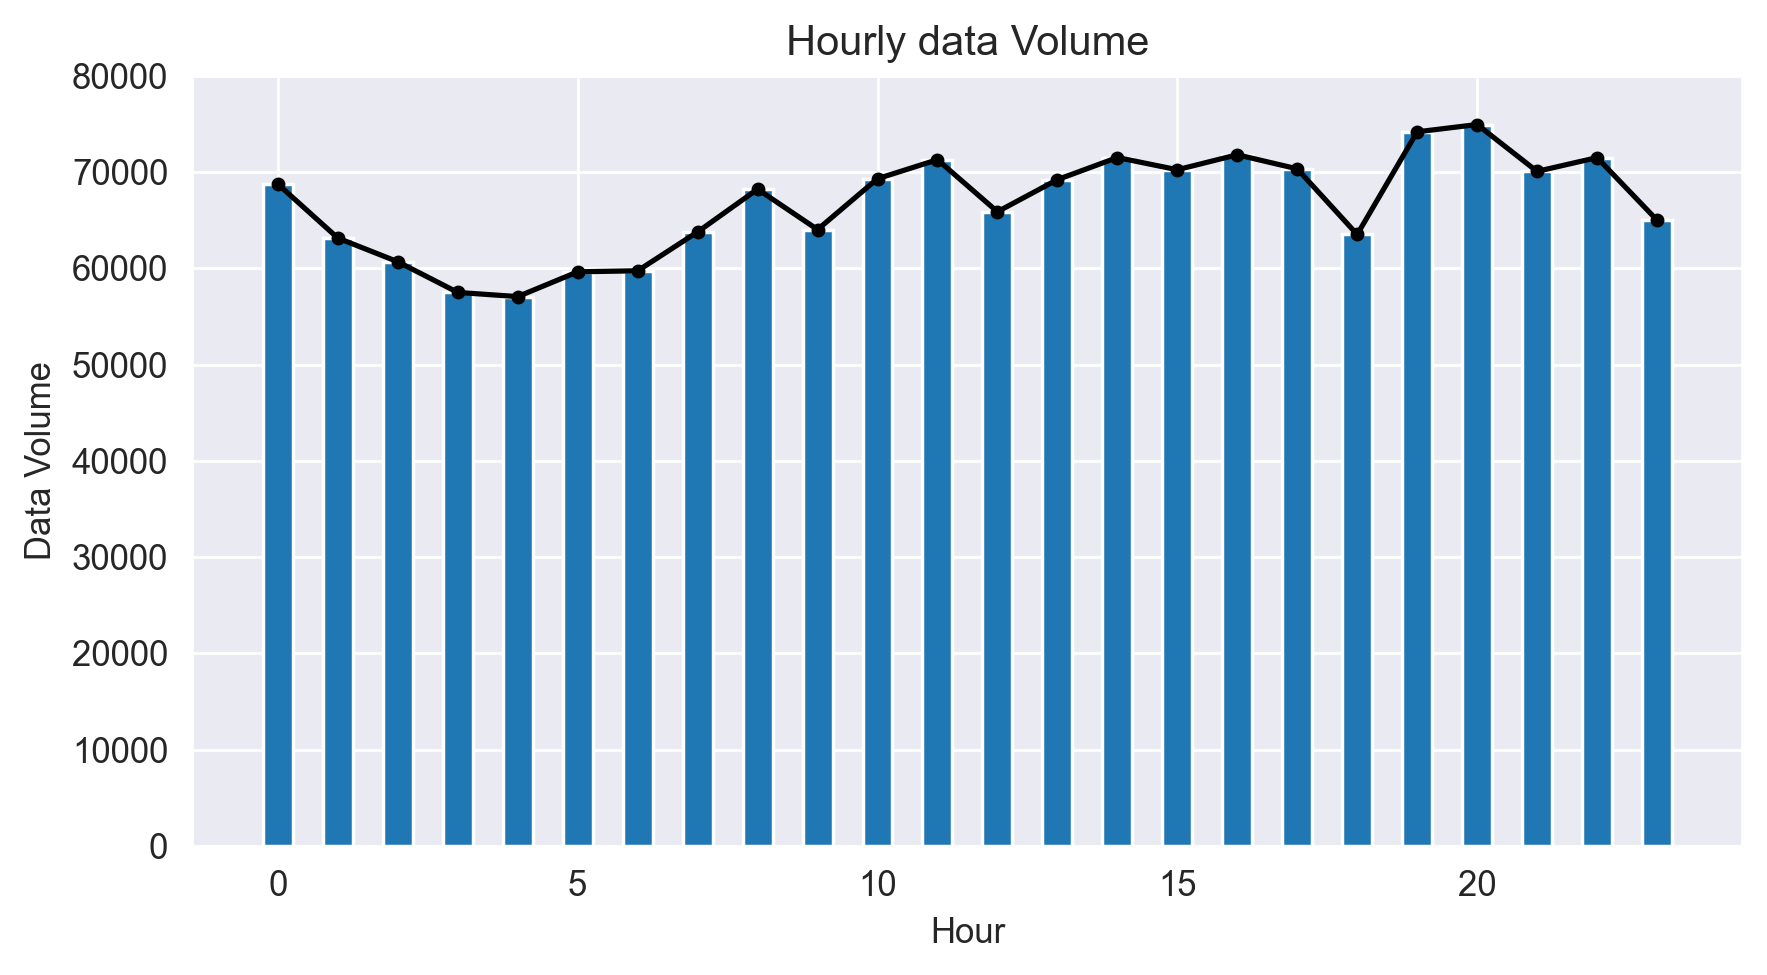

In [17]:
#加上seaborn的主题
import seaborn as sns
sns.set_style('darkgrid',{"xtick.major.size": 10 , "ytick.major.size": 10})

import matplotlib.pyplot as plt
fig     = plt.figure(1,(8,4),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

plt.plot(hour_count['Hour'],hour_count['VehicleNum'],'k-',hour_count['Hour'],hour_count['VehicleNum'],'k.')
plt.bar(hour_count['Hour'],hour_count['VehicleNum'],width =0.5)

plt.title('Hourly data Volume')

plt.ylim(0,80000)
plt.ylabel('Data Volume')
plt.xlabel('Hour')
plt.show()

OK,这里各位可以尝试一下对TaxiOD数据绘制同样的图,即为每小时订单数量

In [18]:
TaxiOD.head(5)

,VehicleNum,Stime,SLng,SLat,ELng,ELat,Etime
0,22223,2013-10-22 00:03:23,114.167465,22.562468,114.225235,22.552750,2013-10-22 00:10:48
1,22223,2013-10-22 00:11:33,114.227150,22.554167,114.229218,22.560217,2013-10-22 00:15:19
2,22223,2013-10-22 00:17:13,114.231354,22.562166,114.255798,22.590967,2013-10-22 00:29:06
3,22223,2013-10-22 00:36:45,114.240196,22.563650,114.119965,22.566668,2013-10-22 00:54:42
4,22223,2013-10-22 01:01:14,114.135414,22.575933,114.166748,22.608267,2013-10-22 01:08:17


# 订单的持续时间箱型图

## 订单的持续时间计算

这里，我想绘制一下订单的持续时间分布图，从TaxiOD来计算每个订单的持续时间吧  
我们创建一列，叫order_time，记录的是从Stime到Etime经过的时间，单位是s

In [19]:
TaxiOD = TaxiOD[-TaxiOD['Etime'].isnull()]

In [21]:
###############################     答    案    ##################################
#计时
import time
timeflag = time.time()
# #方法1：直接硬算
# TaxiOD['order_time'] = TaxiOD['Etime'].str.slice(0,2).astype('int')*3600+\
# TaxiOD['Etime'].str.slice(3,5).astype('int')*60+\
# TaxiOD['Etime'].str.slice(6,8).astype('int')-\
# TaxiOD['Stime'].str.slice(0,2).astype('int')*3600-\
# TaxiOD['Stime'].str.slice(3,5).astype('int')*60-\
# TaxiOD['Stime'].str.slice(6,8).astype('int')

# #计算耗时
# print('方法1',time.time()-timeflag,'s')
# timeflag = time.time()

#方法2：转换为时间格式，相减后提取秒
TaxiOD['order_time'] = (pd.to_datetime(TaxiOD['Etime'])-pd.to_datetime(TaxiOD['Stime'])).dt.total_seconds()
#计算耗时
print('方法2',time.time()-timeflag,'s')
timeflag = time.time()

###################################################################################

TaxiOD['order_time'].head(5)

方法2 0.542628288269043 s


0     445.0
1     226.0
2     713.0
3    1077.0
4     423.0
Name: order_time, dtype: float64

## 用两种方式绘图

首先用plt.boxplot绘制全部数据分布的箱型图

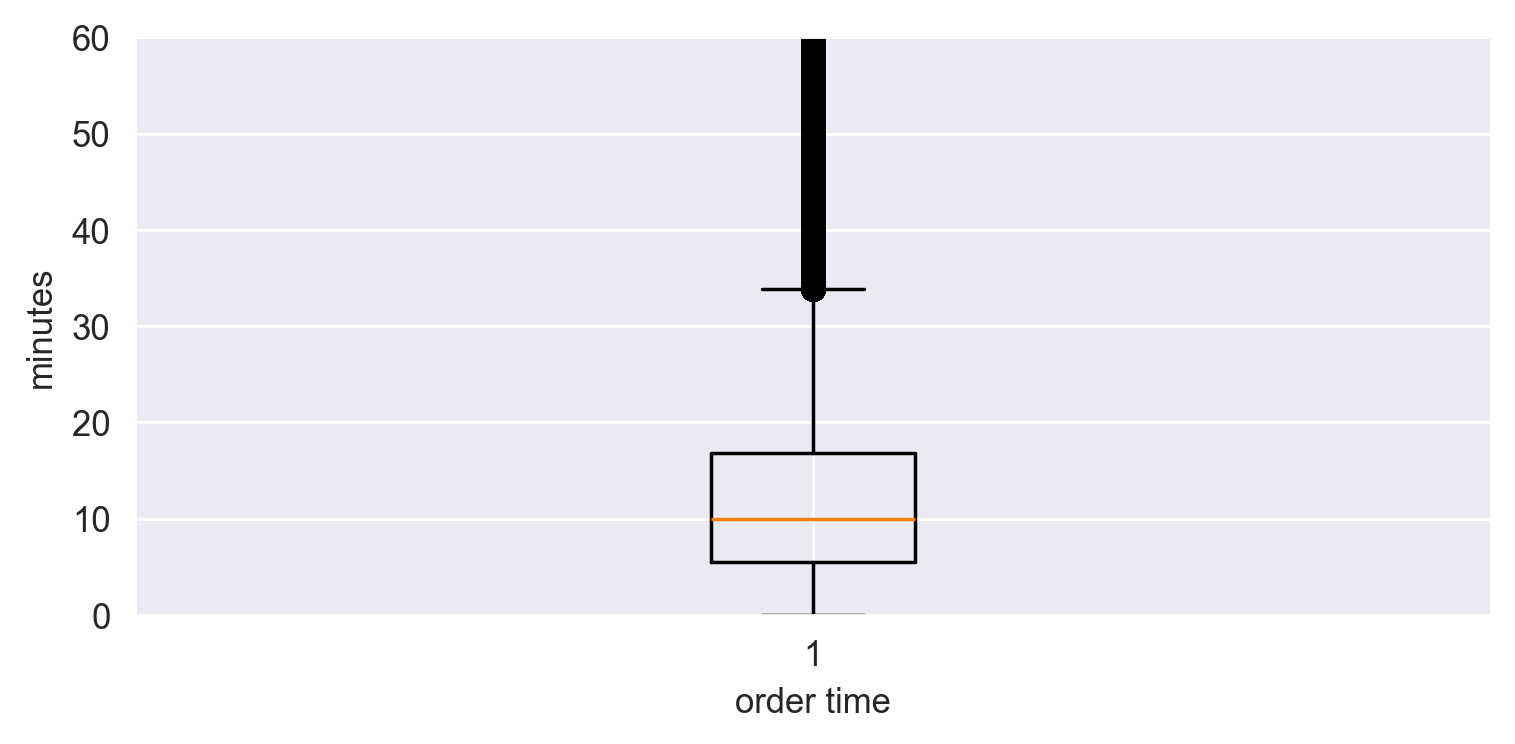

In [22]:
fig     = plt.figure(1,(7,3),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

plt.boxplot(TaxiOD['order_time']/60)

plt.ylabel('minutes')
plt.xlabel('order time')
plt.ylim(0,60)
plt.show()

这里，我想要制以每小时分组的订单时间分布

In [23]:
TaxiOD['Hour'] = TaxiOD['Stime'].str.slice(0,2)

多分组的时候，plt的boxplot需要这样传入参数:
>plt.boxplot([数据1,数据2,...])

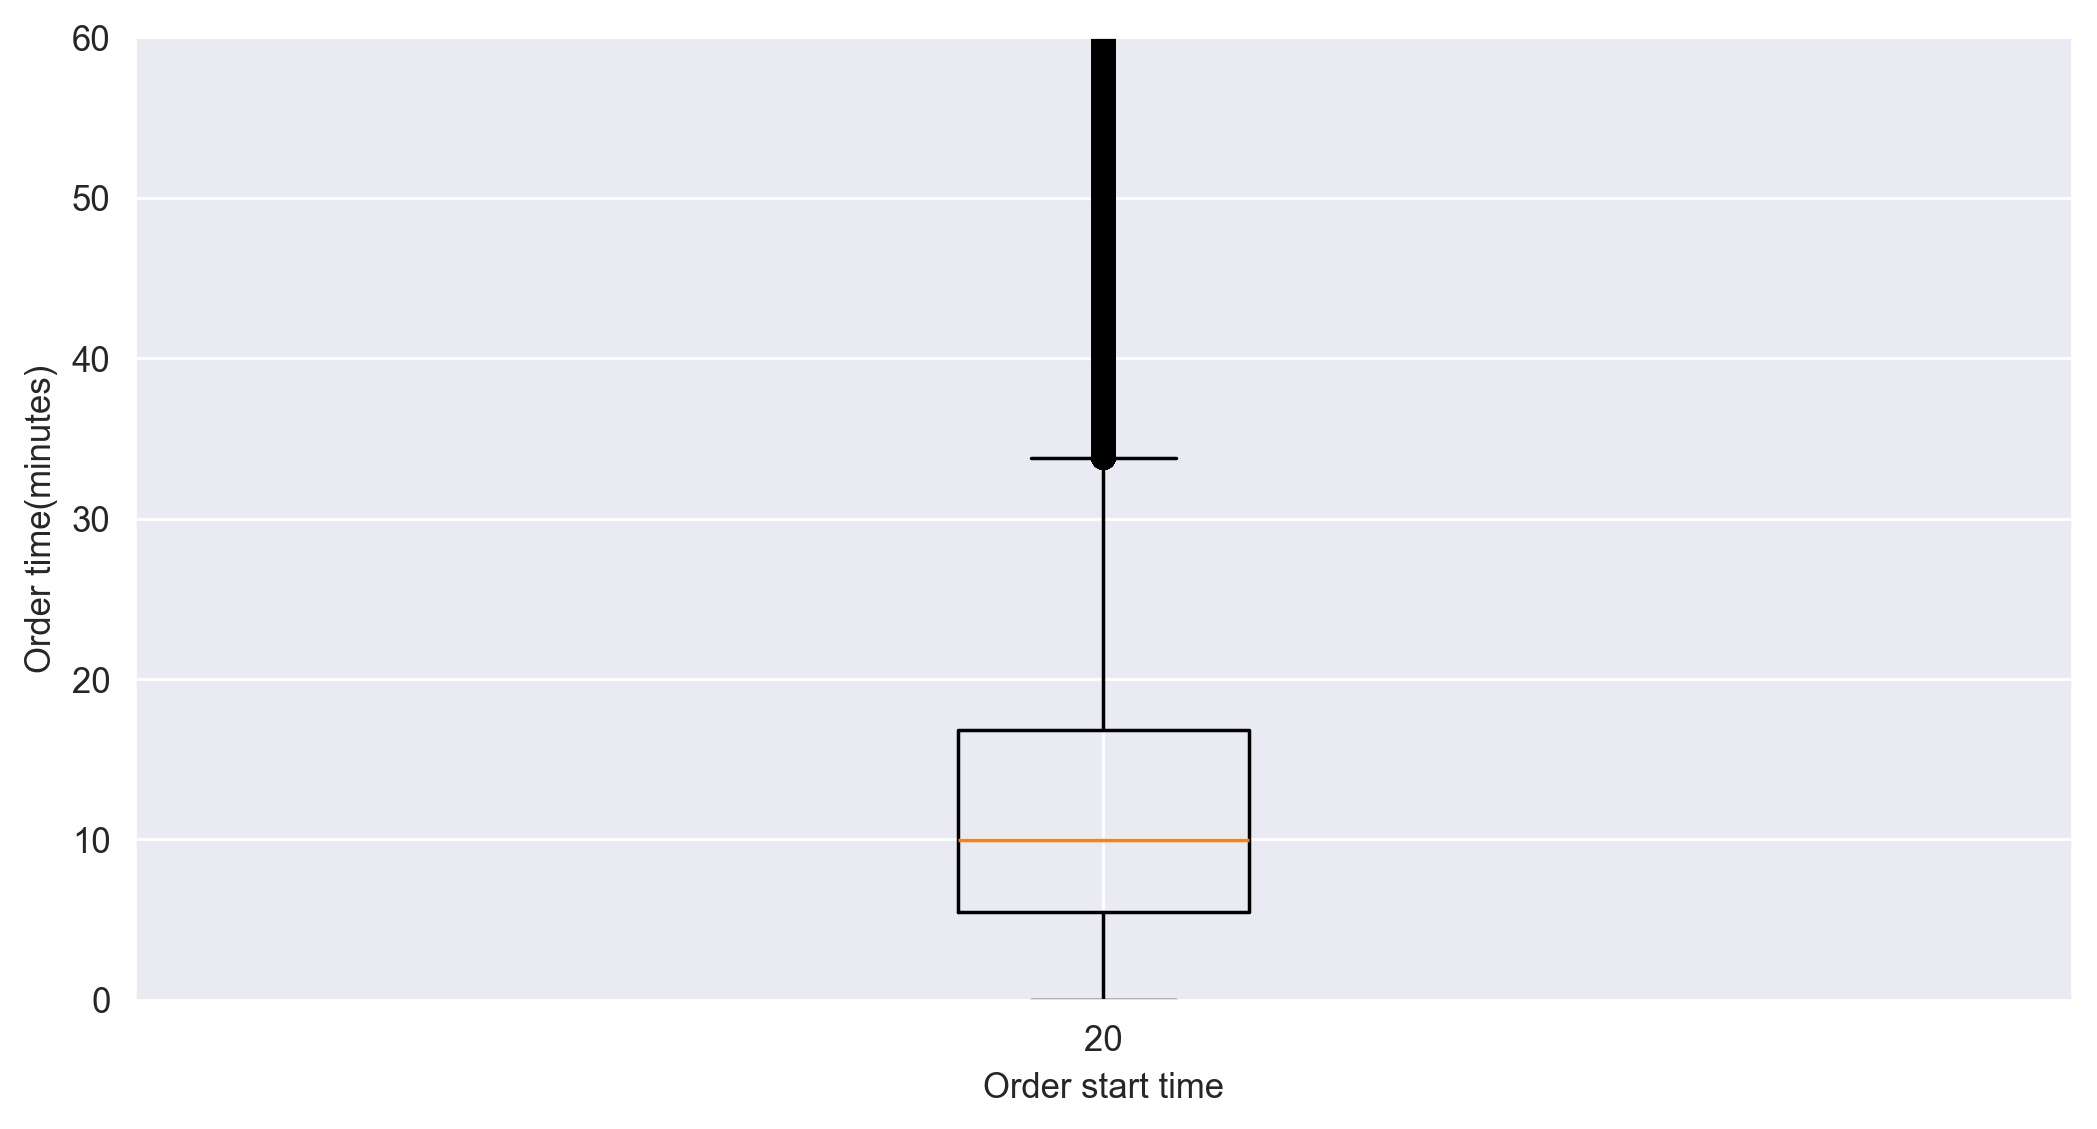

In [24]:
fig     = plt.figure(1,(10,5),dpi = 250)     
ax      = plt.subplot(111)
plt.sca(ax)

###############################     答    案    ##################################
#整理数据
hour = TaxiOD['Hour'].drop_duplicates().sort_values()
datas = []
for i in range(len(hour)):
    datas.append(TaxiOD[TaxiOD['Hour']==hour.iloc[i]]['order_time']/60)
#绘制
plt.boxplot(datas)
#更改x轴ticks的文字
plt.xticks(range(1,len(hour)+1),list(hour))
###################################################################################

plt.ylabel('Order time(minutes)')
plt.xlabel('Order start time')
plt.ylim(0,60)


plt.show()

用seaborn包绘制以每小时分组的订单时间分布，这时候我们只需要输入整个数据，就可以很方便的画出来

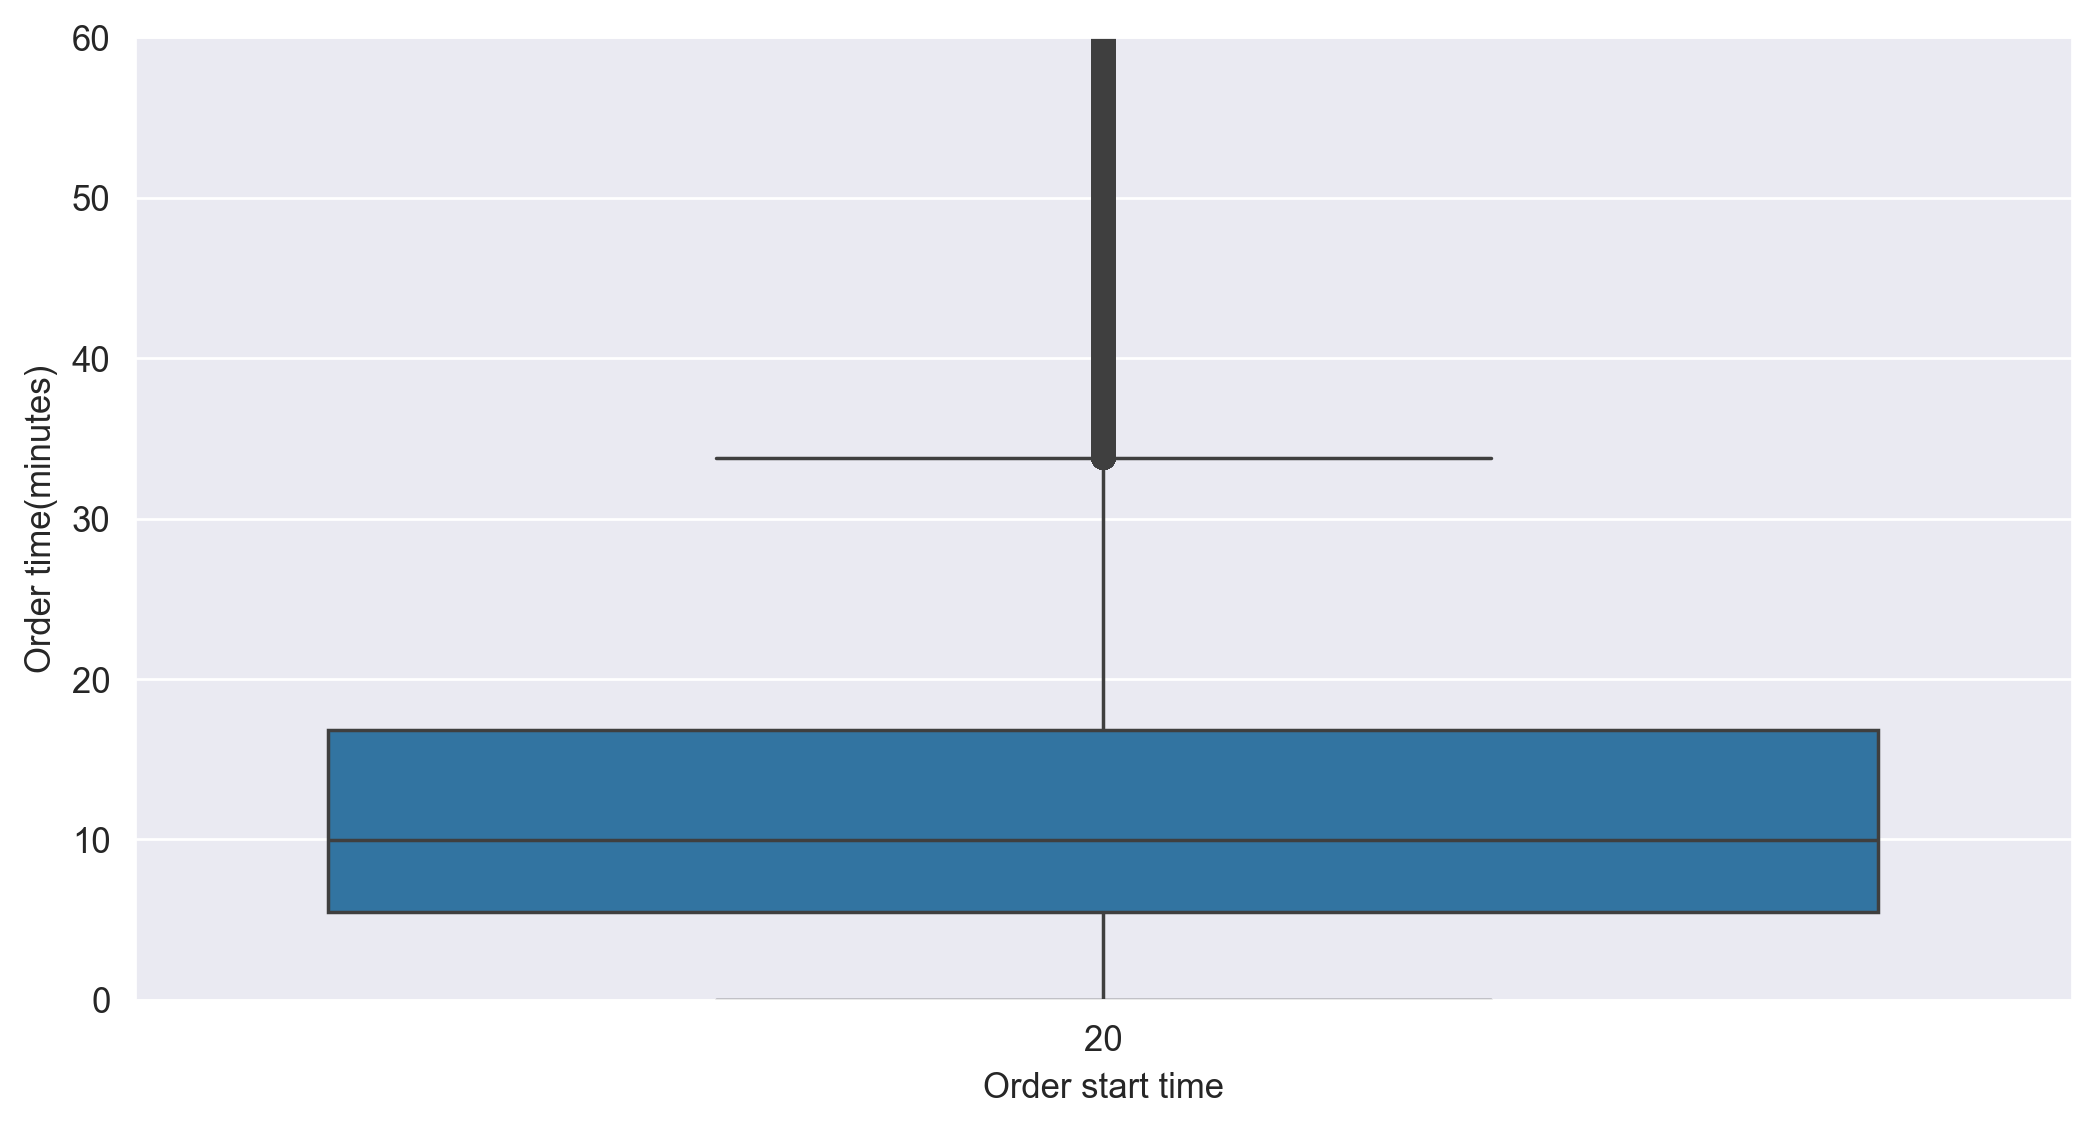

In [25]:

import seaborn as sns
fig     = plt.figure(1,(10,5),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

#只需要一行
sns.boxplot(x="Hour", y=TaxiOD["order_time"]/60, data=TaxiOD,ax = ax)

plt.ylabel('Order time(minutes)')
plt.xlabel('Order start time')
plt.ylim(0,60)
plt.show()